In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

In [2]:
imgFile = './GAN/1.jpg'
# load an original image
img = cv2.imread(imgFile)

In [3]:
# color value range
cRange = 256

rows,cols,channels = img.shape

# convert color space from bgr to gray
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
# laplacian edge
imgLap = cv2.Laplacian(imgGray,cv2.CV_8U)

# otsu method
threshold,imgOtsu = cv2.threshold(imgGray,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# adaptive gaussian threshold  
imgAdapt = cv2.adaptiveThreshold(imgGray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
# imgAdapt = cv2.medianBlur(imgAdapt, 3)    

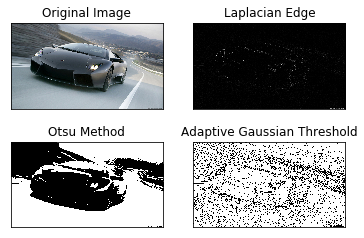

In [5]:
# display original image and gray image
plt.subplot(2,2,1), plt.imshow(img), plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2), plt.imshow(imgLap,cmap = 'gray'), plt.title('Laplacian Edge'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3), plt.imshow(imgOtsu,cmap = 'gray'), plt.title('Otsu Method'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4), plt.imshow(imgAdapt,cmap = 'gray'), plt.title('Adaptive Gaussian Threshold'), plt.xticks([]), plt.yticks([])
plt.show()        

In [6]:
from PIL import Image
new_im = Image.fromarray(imgOtsu.astype(np.uint8))
new_im.show()
new_im.save('1.jpg')